In [ ]:
import numpy as np
import torch
import json
import matplotlib.pyplot as plt

from utils.aoj import AspenOpenJets, JetFeatures 
from utils.tensorclass import TensorMultiModal
from utils.plotting import plot_hist_and_ratio

num_jets = 270_000
max_num_particles = 150

aoj = AspenOpenJets(data_dir="/home/df630/Multimodal-Bridges/data/aoj", data_files="RunG_batch1.h5")

test, _ = aoj(num_jets=num_jets,
            download=False,      
            max_num_particles=max_num_particles,           
            features={"continuous": ['pt', 'eta_rel', 'phi_rel'], "discrete": "tokens"},
            pt_order=True,
            padding='zeros',
            )

test = test.squeeze(-1, 'discrete')
aoj = JetFeatures(test)  

/home/df630/Multimodal-flows/multimodal_flows/utils/aoj.py:98: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  list_discrete_feats.append(torch.tensor(feats[features["discrete"]]))


Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness
#--------------------------------------------------------------------------
#                         FastJet release 3.4.3
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPY

# CFM

In [2]:
from utils.tensorclass import TensorMultiModal

sample_cfm = TensorMultiModal.load_from('/home/df630/Multimodal-flows/jet_sequences/CFM/EPiC/cfm_generation_results_500K_steps_6000_temp_1.2.h5')
cfm = JetFeatures(sample_cfm)

Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness


# MMF

In [3]:
sample_mmf = TensorMultiModal.load_from('/home/df630/Multimodal-flows/jet_sequences/mmf_generation_results_500K_steps_1000_temp_0.85_044e161a7fda41b6be6996dd6f55616a.h5')
sample_mmf = sample_mmf.squeeze(-1, 'discrete')
mmf = JetFeatures(sample_mmf)

Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness


# Plots


In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(12, 2.5), gridspec_kw={'height_ratios':[3,1], 'hspace': 0}, sharex='col')

plot_hist_and_ratio(test=aoj.constituents, 
                    gen=cfm.constituents, 
                    gen_ref=mmf.constituents,
                    ax_hist=axes[0, 0], 
                    ax_ratio=axes[1, 0],
                    apply_map_test='mask_bool',
                    apply_map_gen='mask_bool',
                    apply_map_gen_ref='mask_bool',
                    feat='pt', 
                    xlim=(0, 800), 
                    ylim=(0,1),  
                    num_bins=60, 
                    color_test = 'k',
                    lw=.75,
                    xlabel= r'particle $p_T$ [GeV]', 
                    ylabel='density', 
                    legend1='EPiC-FM ', 
                    legend2='MMF', 
                    log_scale=(False, True))

plot_hist_and_ratio(test=aoj.constituents, 
                    gen=cfm.constituents, 
                    gen_ref=mmf.constituents,
                    ax_hist=axes[0, 1], 
                    ax_ratio=axes[1, 1], 
                    apply_map_test='mask_bool',
                    apply_map_gen='mask_bool',
                    apply_map_gen_ref='mask_bool',
                    feat='eta_rel', 
                    xlim=(-0.85, 0.85),  
                    ylim=(0, 4), 
                    num_bins=60, 
                    color_test = 'k',
                    lw=.75,
                    xlabel=r'particle $\Delta\eta$')
                    
plot_hist_and_ratio(test=aoj.constituents, 
                    gen=cfm.constituents, 
                    gen_ref=mmf.constituents,
                    ax_hist=axes[0, 2], 
                    ax_ratio=axes[1, 2], 
                    apply_map_test='mask_bool',
                    apply_map_gen='mask_bool',
                    apply_map_gen_ref='mask_bool',
                    feat='phi_rel', 
                    xlim=(-0.85, 0.85),  
                    ylim=(0, 4),  
                    num_bins=60, 
                    color_test = 'k',
                    lw=.75,
                    xlabel=r'particle $\Delta\phi$')

plot_hist_and_ratio(test=aoj.constituents, 
                    gen=cfm.constituents, 
                    gen_ref=mmf.constituents,
                    ax_hist=axes[0, 2], 
                    ax_ratio=axes[1, 2], 
                    apply_map_test='mask_bool',
                    apply_map_gen='mask_bool',
                    apply_map_gen_ref='mask_bool',
                    feat='phi_rel', 
                    xlim=(-0.85, 0.85),  
                    ylim=(0, 4),  
                    num_bins=60, 
                    color_test = 'k',
                    lw=.75,
                    xlabel=r'particle $\Delta\phi$')

axes[0, 1].set_yticks([0,1,2,3,4])
axes[0, 1].set_yticklabels(['',1,2,3,4])
axes[0, 2].set_yticks([0,1,2,3,4])
axes[0, 2].set_yticklabels(['',1,2,3,4])


plt.tight_layout()
plt.savefig("particle_level_feats.png", dpi=500)
plt.show()

In [48]:
wasserstein(cfm.pt , aoj.pt), wasserstein(mmf.pt, aoj.pt)

(np.float64(0.9201698281781479), np.float64(4.64453643346716))

In [37]:
wasserstein(cfm.m , aoj.m), wasserstein(mmf.m, aoj.m)

(np.float64(1.6378856984047638), np.float64(1.2642252546535606))

In [22]:
wasserstein(cfm.eta, aoj.eta), wasserstein(mmf.eta, aoj.eta)

(np.float64(0.0011788721012831024), np.float64(0.0006310292905826356))

In [23]:
wasserstein(cfm.phi, aoj.phi), wasserstein(mmf.phi, aoj.phi)

(np.float64(0.0027568656831346945), np.float64(0.00029710317510259226))

In [33]:
wasserstein(cfm.tau21.data, aoj.tau21.data), wasserstein(mmf.tau21.data, aoj.tau21.data)

(np.float64(0.03110160832386704), np.float64(0.002331491075304313))

In [34]:
wasserstein(cfm.tau32.data, aoj.tau32.data), wasserstein(mmf.tau32.data, aoj.tau32.data)

(np.float64(0.01855598347796442), np.float64(0.002863050562801561))

In [35]:
from scipy.stats import wasserstein_distance

def wasserstein(target, ref):
    # target = target[np.isnan(target)==0]
    # ref = ref[np.isnan(ref)==0]        
    return wasserstein_distance(target, ref)

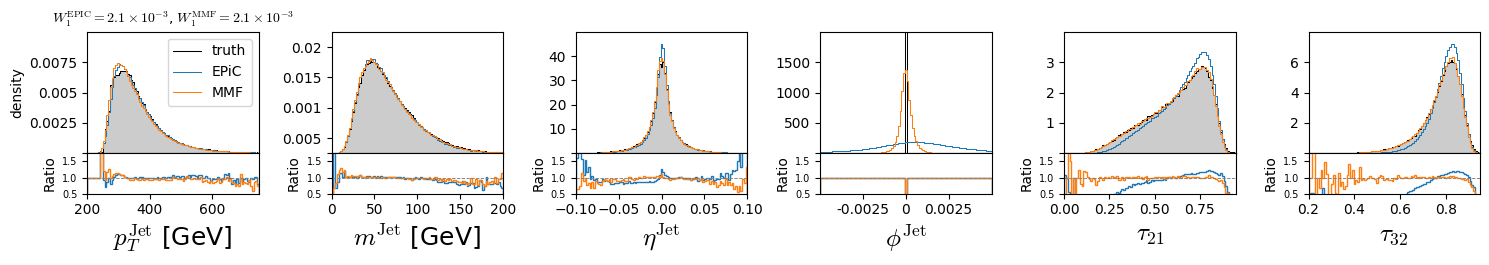

In [92]:
fig, axes = plt.subplots(2, 6, figsize=(15, 2.75), gridspec_kw={'height_ratios':[3,1], 'hspace': 0}, sharex='col')


plot_hist_and_ratio(test=aoj, 
                    gen=cfm, 
                    gen_ref=mmf,
                    ax_hist=axes[0, 0], 
                    ax_ratio=axes[1, 0], 
                    feat='pt', 
                    xlim=(200, 750), 
                    ylim=(0, 0.01),  
                    num_bins=100, 
                    color_test = 'k',
                    fill=True,
                    xlabel= r'$p_T^{\rm Jet}$ [GeV]', 
                    ylabel='density',
                    legend1='EPiC',
                    legend2='MMF'
                     )

plot_hist_and_ratio(aoj, 
                    cfm, 
                    gen_ref=mmf,
                    ax_hist=axes[0, 1], 
                    ax_ratio=axes[1, 1],  
                    feat='m', 
                    xlim=(0, 200),  
                    ylim=(0, 0.02), 
                    num_bins=100, 
                    color_test = 'k',
                    fill=True,
                    xlabel=r'$m^{\rm Jet}$ [GeV]')
                    
plot_hist_and_ratio(test=aoj, 
                    gen=cfm, 
                    gen_ref=mmf,
                    ax_hist=axes[0, 2], 
                    ax_ratio=axes[1, 2], 
                    feat='eta', 
                    xlim=(-0.1,0.1), 
                    ylim=(0, 50),  
                    num_bins=100,
                    color_test = 'k',
                    fill=True,
                    xlabel=r'$\eta^{\rm Jet}$')

plot_hist_and_ratio(test=aoj, 
                    gen=cfm, 
                    gen_ref=mmf,
                    ax_hist=axes[0, 3], 
                    ax_ratio=axes[1, 3], 
                    feat='phi', 
                    xlim=(-0.005,0.005), 
                    ylim=(0,2000),  
                    num_bins=100,
                    color_test = 'k',
                    xlabel=r'$\phi^{\rm Jet}$')

plot_hist_and_ratio(test=aoj, 
                    gen=cfm, 
                    gen_ref=mmf, 
                    ax_hist=axes[0, 4], 
                    ax_ratio=axes[1, 4], 
                    feat='tau21', 
                    xlim=(0,0.95), 
                    ylim=(0,4),  
                    num_bins=100,
                    color_test = 'k',
                    fill=True,
                    xlabel=r'$\tau_{21}$')

plot_hist_and_ratio(test=aoj, 
                    gen=cfm, 
                    gen_ref=mmf, 
                    ax_hist=axes[0, 5], 
                    ax_ratio=axes[1, 5], 
                    feat='tau32', 
                    xlim=(0.2, 0.95), 
                    ylim=(0,8),  
                    num_bins=100,
                    color_test = 'k',
                    fill=True,
                    xlabel=r'$\tau_{32}$')

axes[0, 0].set_yticks([0, 0.0025,0.005, 0.0075])
axes[0, 0].set_yticklabels(['', 0.0025,0.005, 0.0075])
axes[0, 1].set_yticks([0,0.0025,0.0075,0.0125,0.0175])
axes[0, 1].set_yticklabels(['',0.005,0.001,0.015,0.02])
axes[0, 2].set_yticks([0,10,20,30,40])
axes[0, 2].set_yticklabels(['',10,20,30,40])
axes[0, 3].set_xticks([-0.0025,0, 0.0025])
axes[0, 3].set_xticklabels([-0.0025,0, 0.0025])
axes[0, 3].set_yticks([0,500, 1000,1500])
axes[0, 3].set_yticklabels(['',500, 1000,1500])
axes[0, 4].set_yticks([0,1,2,3])
axes[0, 4].set_yticklabels(['',1,2,3])
axes[0, 5].set_yticks([0, 2,4, 6])
axes[0, 5].set_yticklabels(['',  2,4, 6])

plt.tight_layout()
plt.savefig("jets_level_feats.pdf", dpi=800)
plt.show()

In [51]:
import torch

@torch.no_grad()
def calibrate_rare_to_common_smooth(
    data,
    p0: float = 0.4,            # flip prob scale at very low pT
    pt0: float = 100.0,           # decay scale in GeV
    k: float = 1.0,              # shape exponent; k>1 shrinks faster
    p_min: float = 0.0,          # optional floor for p(pt)
    p_max: float = 1.0           # optional cap for p(pt)
) -> torch.Tensor:
    """
    Smooth post-hoc calibration:
      - Only rare classes {5,6,7,8} are eligible to flip.
      - Flip prob depends smoothly on pT: p(pt) = p0 * exp(-(pt/pt0)^k).
      - If a flip happens, reassign uniformly to {1,2,3,4}.

    Returns a new (N, D) tensor with calibrated labels.
    """
    assert data.discrete.dim() == 2, "data must be (N, D)"
    assert data.continuous.shape[:2] == data.discrete.shape and data.continuous.shape[-1] >= 1, "kin must be (N, D, >=3)"
    assert data.discrete.dtype in (torch.int32, torch.int64), "data must be integer classes"

    device = data.discrete.device
    out = data.discrete.clone()

    # masks
    rare_mask = (out >= 5)  # classes 5..8
    if not rare_mask.any():
        return out

    # pT and per-entry flip probability
    pt = data.continuous[..., 0].to(torch.float32)  # (N, D)
    # p(pt) = p0 * exp(-(pt/pt0)^k)
    p = float(p0) * torch.exp(- (pt / float(pt0)).clamp_min(0).pow(float(k)))

    # clamp to [p_min, p_max] for safety
    p = p.clamp(min=float(p_min), max=float(p_max))

    # only rare entries are eligible
    p = p * rare_mask.to(p.dtype)

    # bernoulli gate per token
    gate = torch.bernoulli(p).to(torch.bool)  # (N, D)
    if not gate.any():
        return out

    # sample replacements uniformly from {1,2,3,4}
    num_to_flip = int(gate.sum().item())
    repl = torch.randint(1, 5, (num_to_flip,), device=device, dtype=out.dtype)

    # write back
    flat = out.view(-1)
    idx_flat = gate.view(-1).nonzero(as_tuple=True)[0]
    flat[idx_flat] = repl
    return out





In [52]:
sample_mmf_calibrated = sample_mmf.clone()
sample_mmf_calibrated.discrete = calibrate_rare_to_common_smooth(sample_mmf_calibrated, p0=0.5, pt0 = 80)
mmf_calibrated = JetFeatures(sample_mmf_calibrated)

Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness


In [53]:
wasserstein(cfm.constituents.num_Photon, aoj.constituents.num_Photon), wasserstein(mmf.constituents.num_Photon, aoj.constituents.num_Photon)

(np.float64(0.2308831851851855), np.float64(0.3382555555555561))

In [54]:
wasserstein(cfm.constituents.num_NeutralHadron, aoj.constituents.num_NeutralHadron), wasserstein(mmf.constituents.num_NeutralHadron, aoj.constituents.num_NeutralHadron)

(np.float64(0.10072451851851866), np.float64(0.01166296296296309))

In [55]:
wasserstein(cfm.constituents.num_PositiveHadron, aoj.constituents.num_PositiveHadron), wasserstein(mmf.constituents.num_PositiveHadron, aoj.constituents.num_PositiveHadron)

(np.float64(0.28100503703703683), np.float64(0.0879111111111103))

In [56]:
wasserstein(cfm.constituents.num_NegativeHadron, aoj.constituents.num_NegativeHadron), wasserstein(mmf.constituents.num_NegativeHadron, aoj.constituents.num_NegativeHadron)

(np.float64(0.23112555555555578), np.float64(0.10275925925925931))

In [57]:
wasserstein(cfm.constituents.num_Electron, aoj.constituents.num_Electron), wasserstein(mmf.constituents.num_Electron, aoj.constituents.num_Electron)

(np.float64(0.0005671111111112959), np.float64(0.05682222222222211))

In [59]:
wasserstein(cfm.constituents.num_Positron, aoj.constituents.num_Positron), wasserstein(mmf.constituents.num_Positron, aoj.constituents.num_Positron)

(np.float64(0.0006841481481482115), np.float64(0.05578148148148154))

In [58]:
wasserstein(cfm.constituents.num_Muon, aoj.constituents.num_Muon), wasserstein(mmf.constituents.num_Muon, aoj.constituents.num_Muon)

(np.float64(0.0026092592592593666), np.float64(0.04318148148148149))

In [60]:
wasserstein(cfm.constituents.num_AntiMuon, aoj.constituents.num_AntiMuon), wasserstein(mmf.constituents.num_AntiMuon, aoj.constituents.num_AntiMuon)

(np.float64(0.0031945185185185965), np.float64(0.04319259259259245))

In [61]:
wasserstein(cfm.jet_charge, aoj.jet_charge), wasserstein(mmf.jet_charge, aoj.jet_charge)

(np.float64(0.009526312918527994), np.float64(0.001374618485509696))

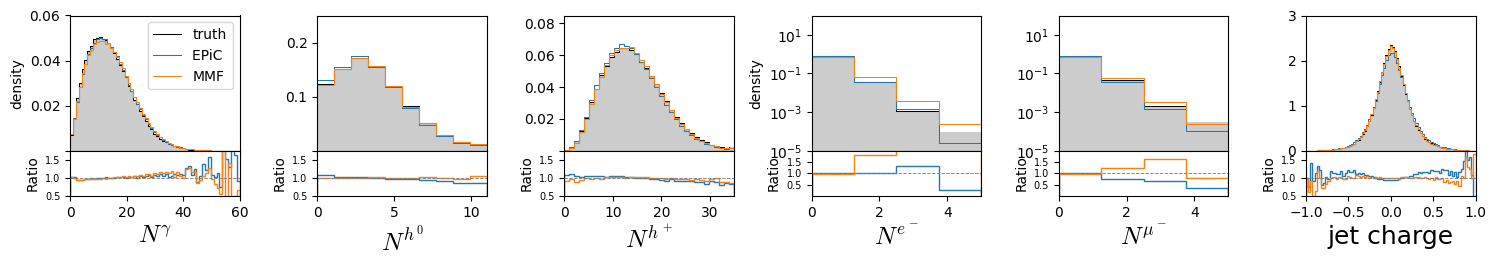

In [86]:
fig, axes = plt.subplots(2, 6, figsize=(15, 2.75), gridspec_kw={'height_ratios':[3,1], 'hspace': 0}, sharex='col')

plot_hist_and_ratio(test=aoj.constituents, 
                    gen=cfm.constituents, 
                    gen_ref=mmf.constituents,
                    ax_hist=axes[0, 0], 
                    ax_ratio=axes[1, 0],
                    feat='num_Photon', 
                    xlim=(0, 60), 
                    ylim=(0, 0.06),  
                    num_bins=60, 
                    color_test = 'k',
                    fill=True,
                    xlabel= r'$N^{\gamma}$', 
                    ylabel='density', 
                    legend1='EPiC ', 
                    legend2='MMF', 
                    )

plot_hist_and_ratio(test=aoj.constituents, 
                    gen=cfm.constituents, 
                    gen_ref=mmf.constituents,
                    ax_hist=axes[0, 1], 
                    ax_ratio=axes[1, 1], 
                    feat='num_NeutralHadron', 
                    xlim=(0, 11),  
                    ylim=(0, .25), 
                    num_bins=11, 
                    # discrete=True,
                    color_test = 'k',
                    fill=True,
                    xlabel= r'$N^{h^0}$', 
                    )             


plot_hist_and_ratio(test=aoj.constituents, 
                    gen=cfm.constituents, 
                    gen_ref=mmf.constituents,
                    ax_hist=axes[0, 2], 
                    ax_ratio=axes[1, 2], 
                    feat='num_PositiveHadron',
                    # discrete=True,
                    xlim=(0, 35),
                    ylim=(0, 0.085),  
                    num_bins=35, 
                    color_test = 'k',
                    fill=True,
                    xlabel= r'$N^{h^+}$', 
                    )   


plot_hist_and_ratio(test=aoj.constituents, 
                    gen=cfm.constituents, 
                    gen_ref=mmf.constituents,
                    ax_hist=axes[0, 3], 
                    ax_ratio=axes[1, 3],
                    # gen_=mmf_calibrated.constituents,
                    feat='num_Electron', 
                    normal_ratio_range=False,
                    xlim=(0, 5), 
                    ylim=(1e-5, 100), 
                    num_bins=5, 
                    apply_map_test='remove_zeros',
                    apply_map_gen='remove_zeros',
                    apply_map_gen_ref='remove_zeros',
                    color_test = 'k',
                    fill=True,
                    xlabel= r'$N^{e^-}$', 
                    ylabel='density', 
                    log_scale=(False,True)
                    )
                    
plot_hist_and_ratio(test=aoj.constituents, 
                    gen=cfm.constituents, 
                    gen_ref=mmf.constituents,
                    ax_hist=axes[0, 4], 
                    ax_ratio=axes[1, 4],
                    # gen_=mmf_calibrated.constituents, 
                    feat='num_Muon',
                    normal_ratio_range=False,
                    xlim=(0, 5), 
                    ylim=(1e-5,100), 
                    num_bins=5, 
                    fill=True,
                    apply_map_test='remove_zeros',
                    apply_map_gen='remove_zeros',
                    apply_map_gen_ref='remove_zeros',
                    color_test = 'k',
                    log_scale=(False,True),
                    xlabel= r'$N^{\mu^-}$', 
                    )   

plot_hist_and_ratio(aoj,
                    cfm,
                    mmf,  
                    axes[0, 5], 
                    axes[1, 5], 
                    feat='jet_charge',
                    xlim=(-1,1), 
                    ylim=(0, 3),
                    color_test = 'k',
                    fill=True,
                    num_bins=80, 
                    xlabel=r'jet charge', 
                    )

axes[0, 0].set_yticks([0,0.02,0.04,0.06])
axes[0, 0].set_yticklabels(['',0.02,0.04,0.06])

axes[0, 1].set_yticks([0, 0.1, 0.2])
axes[0, 1].set_yticklabels(['', 0.1,  0.2])

axes[0, 2].set_yticks([0, 0.02, 0.04, 0.06,0.08])
axes[0, 2].set_yticklabels(['', 0.02, 0.04, 0.06,0.08])

plt.tight_layout()
plt.savefig("discrete_feats.pdf", dpi=800)
plt.show()


In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch
from matplotlib.patches import Polygon
from typing import Union

from utils.metrics import flavor_mutliplicities
from utils.tensorclass import TensorMultiModal
from utils.aoj import JetFeatures

def plot_hist_and_ratio(test, 
                        gen,  
                        gen_ref,
                        ax_hist, 
                        ax_ratio,
                        gen_=None,
                        apply_map_test=None,
                        apply_map_gen=None,
                        apply_map_gen_ref=None,
                        apply_map_gen_=None,
                        normal_ratio_range=True,
                        xlabel=None, 
                        xlim=None,
                        ylim=None,
                        ylabel='',
                        feat=None,
                        num_bins=100, 
                        log_scale=False, 
                        color1=None,
                        color2=None,
                        color3='dodgerblue',
                        color_test='darkslategrey',
                        legend1=None,
                        legend2=None,
                        legend3=None,
                        discrete=False,
                        fill=False,
                        lw=0.75,
                        ls='-',):

    # ------------------------
    # Bin definition
    # ------------------------
    if xlim is not None:
        bins = np.linspace(xlim[0], xlim[1], num_bins)
    else:
        bins = num_bins

    # ------------------------
    # Preprocess map options
    # ------------------------
    if apply_map_test == 'remove_zeros':
        apply_map_test = lambda x: x[x != 0]
    if apply_map_gen == 'remove_zeros':
        apply_map_gen = lambda x: x[x != 0]
    if gen_ref is not None and apply_map_gen_ref == 'remove_zeros':
        apply_map_gen_ref = lambda x: x[x != 0]
    if gen_ is not None and apply_map_gen_ == 'remove_zeros':
        apply_map_gen_ = lambda x: x[x != 0]
    # ------------------------
    # Extract features
    # ------------------------
    if feat is not None:
        x = getattr(test, feat)
        y1 = getattr(gen, feat)
        if gen_ref is not None:
            y2 = getattr(gen_ref, feat)
        if gen_ is not None:
            y3 = getattr(gen_, feat)
    else:
        x = test
        y1 = gen
        if gen_ref is not None:
            y2 = gen_ref
        if gen_ is not None:
            y3 = gen_

    if isinstance(x, torch.Tensor): x = x.cpu().numpy()
    if isinstance(y1, torch.Tensor): y1 = y1.cpu().numpy()
    if gen_ref is not None and isinstance(y2, torch.Tensor): y2 = y2.cpu().numpy()
    if gen_ is not None and isinstance(y3, torch.Tensor): y3 = y3.cpu().numpy()

    if callable(apply_map_test): x = apply_map_test(x)
    if callable(apply_map_gen): y1 = apply_map_gen(y1)
    if gen_ref is not None and callable(apply_map_gen_ref): y2 = apply_map_gen_ref(y2)
    if gen_ is not None and callable(apply_map_gen_): y3 = apply_map_gen__(y3)

    # ------------------------
    # AOJ histogram (safe manual fill)
    # ------------------------
    hist, edges = np.histogram(x, bins=bins, density=True)
    bin_centers = 0.5 * (edges[1:] + edges[:-1])

    # Step-style AOJ line (as before)
    ax_hist.step(edges[:-1], hist, where='post', color=color_test, lw=0.75, label='truth')

    if fill:
        nonzero = hist > 0
        if np.any(nonzero):
            y_base = np.nanmin(hist[nonzero]) / 100 if log_scale else 0.0

            filled_x = []
            filled_y = []

            for left, right, h in zip(edges[:-1], edges[1:], hist):
                if h > 0:
                    # Draw bar rectangle
                    filled_x.extend([left, left, right, right])
                    filled_y.extend([y_base, h, h, y_base])

            # Close the path cleanly
            filled_x.append(filled_x[0])
            filled_y.append(filled_y[0])

            # Add polygon
            poly = Polygon(
                np.column_stack([filled_x, filled_y]),
                closed=True,
                facecolor=color_test,
                alpha=0.2,
                edgecolor='none'
            )
            ax_hist.add_patch(poly)


    # ------------------------
    # Plot generated histograms (using seaborn)
    # ------------------------
    sns.histplot(y1, stat='density', fill=False, bins=bins, ax=ax_hist,
                 ls=ls, lw=lw, color=color1, label=legend1,
                 log_scale=log_scale, element='step')

    if gen_ref is not None:
        sns.histplot(y2, stat='density', fill=False, bins=bins, ax=ax_hist,
                     ls=ls, lw=lw, color=color2, label=legend2,
                     log_scale=log_scale, element='step')

    if gen_ is not None:
        sns.histplot(y3, stat='density', fill=False, bins=bins, ax=ax_hist,
                     ls='--', lw=lw, color=color2, label=legend3,
                     log_scale=log_scale, element='step')

    # ------------------------
    # Ratio calculation
    # ------------------------
    hist1, _ = np.histogram(y1, bins=edges, density=True)
    ratio1 = np.divide(hist1, hist, out=np.ones_like(hist1), where=hist > 0)

    if gen_ref is not None:
        hist2, _ = np.histogram(y2, bins=edges, density=True)
        ratio2 = np.divide(hist2, hist, out=np.ones_like(hist2), where=hist > 0)

    if gen_ is not None:
        hist3, _ = np.histogram(y3, bins=edges, density=True)
        ratio3 = np.divide(hist3, hist, out=np.ones_like(hist3), where=hist > 0)

    # Ratio plots using stairs
    ax_ratio.stairs(ratio1, edges=edges, linestyle=ls, linewidth=1)
    if gen_ref is not None:
        ax_ratio.stairs(ratio2, edges=edges, linestyle=ls, linewidth=1)
    if gen_ is not None:
        ax_ratio.stairs(ratio3, edges=edges, linestyle='--', linewidth=1)
    
    ax_ratio.axhline(1.0, color='gray', linestyle='--', lw=0.65)

    # ------------------------
    # Formatting
    # ------------------------
    ax_hist.set_ylabel(ylabel, fontsize=10)
    if legend1 is not None:
        ax_hist.legend(fontsize=10)

    ax_ratio.set_ylabel("Ratio", fontsize=10)
    if xlabel is not None:
        ax_ratio.set_xlabel(xlabel, fontsize=18)

    if normal_ratio_range:
        ax_ratio.set_ylim(0.75, 1.75)
        ax_ratio.set_yticks([0.5, 1.0, 1.5])
        ax_ratio.set_yticklabels([0.5, 1.0, 1.5], fontsize=7)
    else:
        ax_ratio.set_ylim(0., 2)
        ax_ratio.set_yticks([0.5, 1.0, 1.5])
        ax_ratio.set_yticklabels([0.5, 1.0, 1.5], fontsize=7)
    
    if xlim is not None:
        ax_hist.set_xlim(*xlim)
        ax_ratio.set_xlim(*xlim)
    if ylim is not None:
        ax_hist.set_ylim(*ylim)


# Photons

In [44]:
def get_flavor_specific_subjets(sample, flavor):
    """
    Extracts the flavor-specific data from the sample.
    """
    data = sample.clone()
    mask = data.discrete == flavor
    data.continuous *= mask.unsqueeze(-1)
    data.discrete *= mask
    data.mask *= mask.unsqueeze(-1)
    return JetFeatures(data)


In [45]:
mmf_photons = get_flavor_specific_subjets(sample_mmf_calibrated, flavor=1)
cfm_photons = get_flavor_specific_subjets(sample_cfm, flavor=1)
aoj_photons = get_flavor_specific_subjets(test, flavor=1)


Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness


Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness
Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness


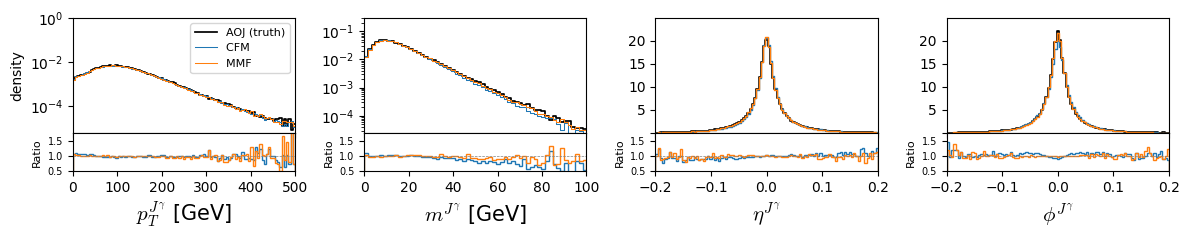

In [46]:
fig, axes = plt.subplots(2, 4, figsize=(12, 2.5), gridspec_kw={'height_ratios':[3,1], 'hspace': 0}, sharex='col')


plot_hist_and_ratio(test=aoj_photons, 
                    gen=cfm_photons, 
                    gen_ref=mmf_photons, 
                    ax_hist=axes[0, 0], 
                    ax_ratio=axes[1, 0], 
                    feat='pt', 
                    xlim=(0, 500), 
                    ylim=(0, 1),  
                    num_bins=100, 
                    color_test = 'k',
                    lw=.75,
                    xlabel= r'$p_T^{J^\gamma}$ [GeV]', 
                    ylabel='density', 
                    legend1='CFM ', 
                    legend2='MMF ', 
                    log_scale=(False, True)
                    )

plot_hist_and_ratio(aoj_photons, 
                    cfm_photons, 
                    gen_ref=mmf_photons, 
                    ax_hist=axes[0, 1], 
                    ax_ratio=axes[1, 1],  
                    feat='m', 
                    xlim=(0, 100),  
                    ylim=(0, 0.3), 
                    num_bins=60, 
                    color_test = 'k',
                    lw=.75,
                    xlabel=r'$m^{J^\gamma}$ [GeV]',
                    log_scale=(False, True),)
                    
plot_hist_and_ratio(test=aoj_photons, 
                    gen=cfm_photons, 
                    gen_ref=mmf_photons, 
                    ax_hist=axes[0, 2], 
                    ax_ratio=axes[1, 2], 
                    feat='eta', 
                    xlim=(-0.2,0.2), 
                    ylim=(0,25),  
                    num_bins=100,
                    color_test = 'k',
                    lw=1.0, 
                    xlabel=r'$\eta^{J^\gamma}$')

plot_hist_and_ratio(test=aoj_photons, 
                    gen=cfm_photons, 
                    gen_ref=mmf_photons, 
                    ax_hist=axes[0, 3], 
                    ax_ratio=axes[1, 3], 
                    feat='phi', 
                    xlim=(-0.2,0.2), 
                    ylim=(0, 25),  
                    num_bins=100,
                    color_test = 'k',
                    lw=1.0, 
                    xlabel=r'$\phi^{J^\gamma}$')


# axes[0, 0].set_yticks([0, 0.002,0.004, 0.006, 0.008])
# axes[0, 0].set_yticklabels(['', 0.002,0.004, 0.006, 0.008])
# axes[0, 1].set_yticks([0,0.02,0.04, 0.06])
# axes[0, 1].set_yticklabels(['',0.02,0.04, 0.065])
axes[0, 2].set_yticks([0, 5 ,10, 15, 20])
axes[0, 2].set_yticklabels(['',5 ,10, 15, 20])
axes[0, 3].set_yticks([0,5 ,10, 15, 20])
axes[0, 3].set_yticklabels(['',5 ,10, 15, 20])

plt.tight_layout()
plt.savefig("jets_level_feats.png", dpi=500)
plt.show()

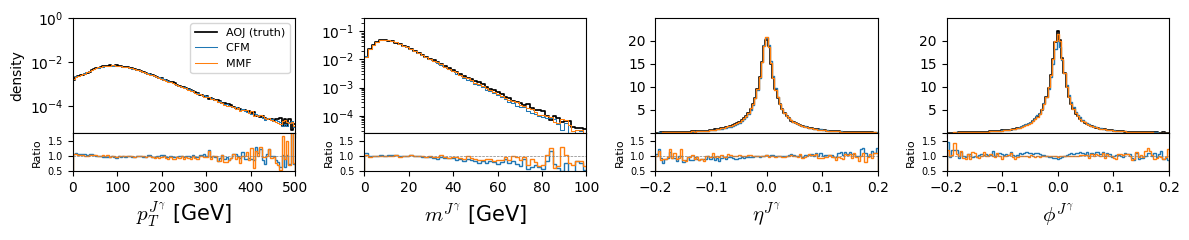

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(12, 2.5), gridspec_kw={'height_ratios':[3,1], 'hspace': 0}, sharex='col')


plot_hist_and_ratio(test=aoj_photons, 
                    gen=cfm_photons, 
                    gen_ref=mmf_photons, 
                    ax_hist=axes[0, 0], 
                    ax_ratio=axes[1, 0], 
                    feat='pt', 
                    xlim=(0, 500), 
                    ylim=(0, 1),  
                    num_bins=100, 
                    color_test = 'k',
                    lw=.75,
                    xlabel= r'$p_T^{J^\gamma}$ [GeV]', 
                    ylabel='density', 
                    legend1='CFM ', 
                    legend2='MMF ', 
                    log_scale=(False, True)
                    )

plot_hist_and_ratio(aoj_photons, 
                    cfm_photons, 
                    gen_ref=mmf_photons, 
                    ax_hist=axes[0, 1], 
                    ax_ratio=axes[1, 1],  
                    feat='m', 
                    xlim=(0, 100),  
                    ylim=(0, 0.3), 
                    num_bins=60, 
                    color_test = 'k',
                    lw=.75,
                    xlabel=r'$m^{J^\gamma}$ [GeV]',
                    log_scale=(False, True),)
                    
plot_hist_and_ratio(test=aoj_photons, 
                    gen=cfm_photons, 
                    gen_ref=mmf_photons, 
                    ax_hist=axes[0, 2], 
                    ax_ratio=axes[1, 2], 
                    feat='eta', 
                    xlim=(-0.2,0.2), 
                    ylim=(0,25),  
                    num_bins=100,
                    color_test = 'k',
                    lw=1.0, 
                    xlabel=r'$\eta^{J^\gamma}$')

plot_hist_and_ratio(test=aoj_photons, 
                    gen=cfm_photons, 
                    gen_ref=mmf_photons, 
                    ax_hist=axes[0, 3], 
                    ax_ratio=axes[1, 3], 
                    feat='phi', 
                    xlim=(-0.2,0.2), 
                    ylim=(0, 25),  
                    num_bins=100,
                    color_test = 'k',
                    lw=1.0, 
                    xlabel=r'$\phi^{J^\gamma}$')


# axes[0, 0].set_yticks([0, 0.002,0.004, 0.006, 0.008])
# axes[0, 0].set_yticklabels(['', 0.002,0.004, 0.006, 0.008])
# axes[0, 1].set_yticks([0,0.02,0.04, 0.06])
# axes[0, 1].set_yticklabels(['',0.02,0.04, 0.065])
axes[0, 2].set_yticks([0, 5 ,10, 15, 20])
axes[0, 2].set_yticklabels(['',5 ,10, 15, 20])
axes[0, 3].set_yticks([0,5 ,10, 15, 20])
axes[0, 3].set_yticklabels(['',5 ,10, 15, 20])

plt.tight_layout()
plt.savefig("jets_level_feats.png", dpi=500)
plt.show()

# Neutral Hadrons

In [47]:
cfm_neutral_hadrons = get_flavor_specific_subjets(sample_cfm, flavor=2)
mmf_neutral_hadrons = get_flavor_specific_subjets(sample_mmf_calibrated, flavor=2)
aoj_neutral_hadrons = get_flavor_specific_subjets(test, flavor=2)

Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness


Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness
Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness


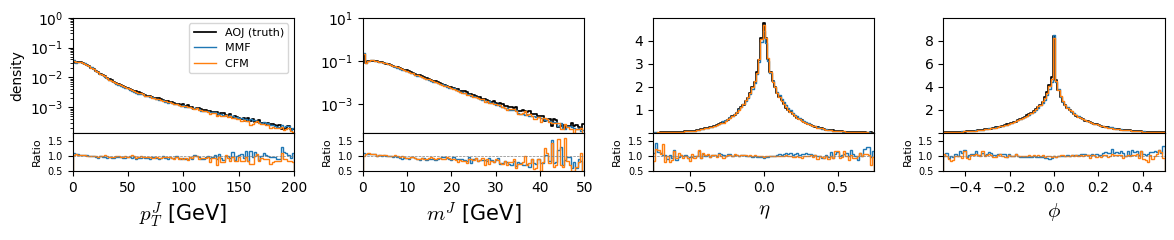

In [ ]:

fig, axes = plt.subplots(2, 4, figsize=(12, 2.5), gridspec_kw={'height_ratios':[3,1], 'hspace': 0}, sharex='col')


plot_hist_and_ratio(test=aoj_neutral_hadrons, 
                    gen=cfm_neutral_hadrons, 
                    gen_ref=mmf_neutral_hadrons,
                    ax_hist=axes[0, 0], 
                    ax_ratio=axes[1, 0], 
                    feat='pt', 
                    xlim=(0,200), 
                    ylim=(0, 1),  
                    num_bins=100, 
                    color_test = 'k',
                    lw=1.0,
                    xlabel= r'$p_T^J$ [GeV]', 
                    ylabel='density', 
                    legend1='CFM ', 
                    legend2='MMF ', 
                     log_scale=(False, True))

plot_hist_and_ratio(test=aoj_neutral_hadrons, 
                    gen=cfm_neutral_hadrons, 
                    gen_ref=mmf_neutral_hadrons,
                    ax_hist=axes[0, 1], 
                    ax_ratio=axes[1, 1],
                    feat='m', 
                    xlim=(0, 50),  
                    ylim=(0, 10), 
                    num_bins=100, 
                    color_test = 'k',
                    lw=1.0,
                    xlabel=r'$m^J$ [GeV]',
                    log_scale=(False, True)
)
                    
plot_hist_and_ratio(test=aoj_neutral_hadrons, 
                    gen=cfm_neutral_hadrons, 
                    gen_ref=mmf_neutral_hadrons,
                    ax_hist=axes[0, 2], 
                    ax_ratio=axes[1, 2], 
                    feat='eta', 
                    xlim=(-.75,.75), 
                    ylim=(0,5),  
                    num_bins=100,
                    color_test = 'k',
                    lw=1.0, 
                    xlabel=r'$\eta$')

plot_hist_and_ratio(test=aoj_neutral_hadrons, 
                    gen=cfm_neutral_hadrons, 
                    gen_ref=mmf_neutral_hadrons,
                    ax_hist=axes[0, 3], 
                    ax_ratio=axes[1, 3], 
                    feat='phi', 
                    xlim=(-0.5,0.5), 
                    ylim=(0,10),  
                    num_bins=100,
                    color_test = 'k',
                    lw=1.0, 
                    xlabel=r'$\phi$')



# axes[0, 0].set_yticks([0, 0.01,0.03, 0.05])
# axes[0, 0].set_yticklabels(['', 0.01,0.03, 0.05])
# axes[0, 1].set_yticks([0,0.0025,0.0075,0.0125,0.0175])
# axes[0, 1].set_yticklabels(['',0.0025,0.0075,0.0125,0.0175])
axes[0, 2].set_yticks([0,1,2,3,4])
axes[0, 2].set_yticklabels(['',1,2,3,4])
axes[0, 3].set_yticks([0,2,4,6,8])
axes[0, 3].set_yticklabels(['',2,4,6,8])

plt.tight_layout()
plt.savefig("jets_level_feats.png", dpi=500)
plt.show()

#

# Charged Hadrons

In [59]:
def get_flavor_charged_hadrons_subjets(sample, flavor):
    """
    Extracts the flavor-specific data from the sample.
    """
    data = sample.clone()
    mask = (data.discrete == 3) | (data.discrete == 4)
    data.continuous *= mask.unsqueeze(-1)
    data.discrete *= mask
    data.mask *= mask.unsqueeze(-1)
    return JetFeatures(data)



cfm_charged_hadrons = get_flavor_charged_hadrons_subjets(sample_cfm, flavor=3)
# aoj_charged_hadrons = get_flavor_charged_hadrons_subjets(test, flavor=3)
# mmf_charged_hadrons = get_flavor_charged_hadrons_subjets(sample_mmf, flavor=2)


Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness


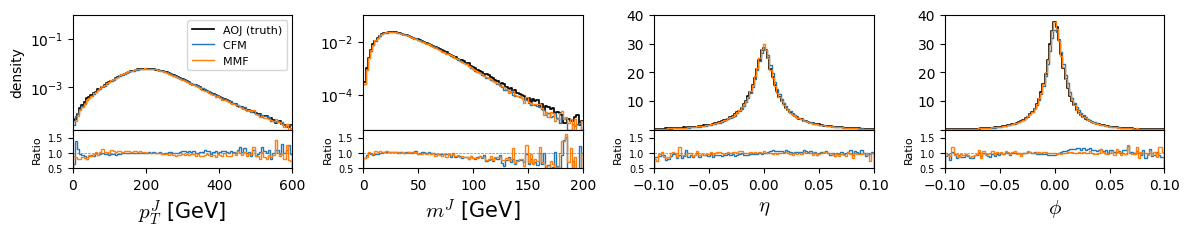

In [61]:
fig, axes = plt.subplots(2, 4, figsize=(12, 2.5), gridspec_kw={'height_ratios':[3,1], 'hspace': 0}, sharex='col')


plot_hist_and_ratio(test=aoj_charged_hadrons, 
                    gen=cfm_charged_hadrons, 
                    gen_ref=mmf_charged_hadrons,
                    ax_hist=axes[0, 0], 
                    ax_ratio=axes[1, 0],  
                    feat='pt', 
                    xlim=(0, 600), 
                    ylim=(0, 1),  
                    num_bins=100, 
                    color_test = 'k',
                    lw=1.0,
                    xlabel= r'$p_T^J$ [GeV]', 
                    log_scale=(False, True),
                    ylabel='density', 
                    legend1='CFM ', 
                    legend2='MMF ', )

plot_hist_and_ratio(test=aoj_charged_hadrons, 
                    gen=cfm_charged_hadrons, 
                    gen_ref=mmf_charged_hadrons,
                    ax_hist=axes[0, 1], 
                    ax_ratio=axes[1, 1],  
                    feat='m', 
                    xlim=(0, 200),  
                    ylim=(0, 0.1), 
                    num_bins=100, 
                    log_scale=(False, True),
                    color_test = 'k',
                    lw=1.0,
                    xlabel=r'$m^J$ [GeV]')
                    
plot_hist_and_ratio(test=aoj_charged_hadrons, 
                    gen=cfm_charged_hadrons, 
                    gen_ref=mmf_charged_hadrons,
                    ax_hist=axes[0, 2], 
                    ax_ratio=axes[1, 2],  
                    feat='eta', 
                    xlim=(-0.1,0.1), 
                    ylim=(0,40),  
                    num_bins=100,
                    color_test = 'k',
                    lw=1.0, 
                    xlabel=r'$\eta$')

plot_hist_and_ratio(test=aoj_charged_hadrons, 
                    gen=cfm_charged_hadrons, 
                    gen_ref=mmf_charged_hadrons,
                    ax_hist=axes[0, 3], 
                    ax_ratio=axes[1, 3],  
                    feat='phi', 
                    xlim=(-0.1,0.1), 
                    ylim=(0,40),  
                    num_bins=100,
                    color_test = 'k',
                    lw=1.0, 
                    xlabel=r'$\phi$')


axes[0, 2].set_yticks([0,10,20,30,40])
axes[0, 2].set_yticklabels(['',10,20,30,40])
axes[0, 3].set_yticks([0,10,20,30,40])
axes[0, 3].set_yticklabels(['',10,20,30,40])

plt.tight_layout()
plt.savefig("charged_hadron_subjets.png", dpi=500)
plt.show()

# Leptons

In [142]:
def get_flavor_leptons_subjets(sample, flavor):
    """
    Extracts the flavor-specific data from the sample.
    """
    data = sample.clone()
    mask = data.discrete > 4
    data.continuous *= mask.unsqueeze(-1)
    data.discrete *= mask
    data.mask *= mask.unsqueeze(-1)
    return JetFeatures(data)


cfm_electron = get_flavor_specific_subjets(sample_cfm, flavor=5)
aoj_electron = get_flavor_specific_subjets(test, flavor=5)
mmf_electron = get_flavor_specific_subjets(sample_mmf_calibrated, flavor=5)


cfm_positron = get_flavor_specific_subjets(sample_cfm, flavor=6)
aoj_positron = get_flavor_specific_subjets(test, flavor=6)
mmf_positron = get_flavor_specific_subjets(sample_mmf_calibrated, flavor=6)

cfm_muons = get_flavor_specific_subjets(sample_cfm, flavor=7)
aoj_muons = get_flavor_specific_subjets(test, flavor=7)
mmf_muons = get_flavor_specific_subjets(sample_mmf_calibrated, flavor=7)

cfm_antimuons = get_flavor_specific_subjets(sample_cfm, flavor=8)
aoj_antimuons = get_flavor_specific_subjets(test, flavor=8)
mmf_antimuons = get_flavor_specific_subjets(sample_mmf_calibrated, flavor=8)


Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness


Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness
Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness
Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness
Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness
Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness
Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N

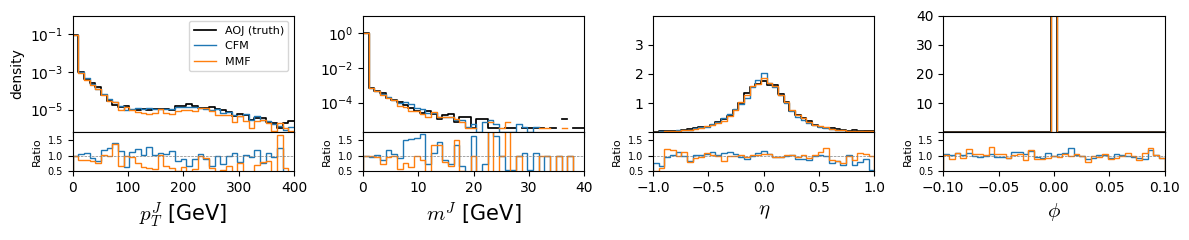

In [143]:
fig, axes = plt.subplots(2, 4, figsize=(12, 2.5), gridspec_kw={'height_ratios':[3,1], 'hspace': 0}, sharex='col')


plot_hist_and_ratio(test=aoj_electron, 
                    gen=cfm_electron,
                    gen_ref=mmf_electron,
                    ax_hist=axes[0, 0], 
                    ax_ratio=axes[1, 0],  
                    feat='pt', 
                    xlim=(0, 400), 
                    ylim=(0, 1),  
                    num_bins=40, 
                    color_test = 'k',
                    lw=1.0,
                    xlabel= r'$p_T^J$ [GeV]', 
                    log_scale=(False, True),
                    ylabel='density', 
                    legend1='CFM ', 
                    legend2='MMF ', )

plot_hist_and_ratio(test=aoj_electron, 
                    gen=cfm_electron,
                    gen_ref=mmf_electron,
                    ax_hist=axes[0, 1], 
                    ax_ratio=axes[1, 1],  
                    feat='m', 
                    xlim=(0, 40),  
                    ylim=(0, 10), 
                    num_bins=40, 
                    log_scale=(False, True),
                    color_test = 'k',
                    lw=1.0,
                    xlabel=r'$m^J$ [GeV]')
                    
plot_hist_and_ratio(test=aoj_electron, 
                    gen=cfm_electron,
                    gen_ref=mmf_electron,
                    ax_hist=axes[0, 2], 
                    ax_ratio=axes[1, 2],  
                    feat='eta', 
                    xlim=(-1,1), 
                    ylim=(0,4),  
                    num_bins=40,
                    color_test = 'k',
                    lw=1.0, 
                    xlabel=r'$\eta$')

plot_hist_and_ratio(test=aoj_electron, 
                    gen=cfm_electron,
                    gen_ref=mmf_electron,
                    ax_hist=axes[0, 3], 
                    ax_ratio=axes[1, 3],  
                    feat='phi', 
                    xlim=(-0.1,0.1), 
                    ylim=(0,40),  
                    num_bins=40,
                    color_test = 'k',
                    lw=1.0, 
                    xlabel=r'$\phi$')


axes[0, 2].set_yticks([0,1,2,3])
axes[0, 2].set_yticklabels(['',1,2,3])
axes[0, 3].set_yticks([0,10,20,30,40])
axes[0, 3].set_yticklabels(['',10,20,30,40])

plt.tight_layout()
plt.savefig("electrons_subjets.png", dpi=500)
plt.show()

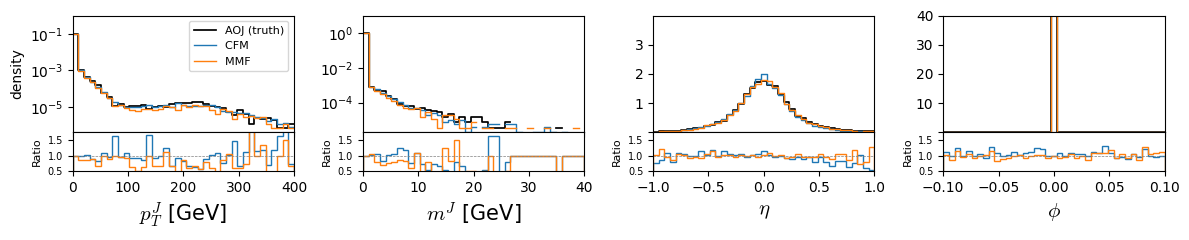

In [144]:
fig, axes = plt.subplots(2, 4, figsize=(12, 2.5), gridspec_kw={'height_ratios':[3,1], 'hspace': 0}, sharex='col')


plot_hist_and_ratio(test=aoj_positron, 
                    gen=cfm_positron,
                    gen_ref=mmf_positron,
                    ax_hist=axes[0, 0], 
                    ax_ratio=axes[1, 0],  
                    feat='pt', 
                    xlim=(0, 400), 
                    ylim=(0, 1),  
                    num_bins=40, 
                    color_test = 'k',
                    lw=1.0,
                    xlabel= r'$p_T^J$ [GeV]', 
                    log_scale=(False, True),
                    ylabel='density', 
                    legend1='CFM ', 
                    legend2='MMF ', )

plot_hist_and_ratio(test=aoj_positron, 
                    gen=cfm_positron,
                    gen_ref=mmf_positron,
                    ax_hist=axes[0, 1], 
                    ax_ratio=axes[1, 1],  
                    feat='m', 
                    xlim=(0, 40),  
                    ylim=(0, 10), 
                    num_bins=40, 
                    log_scale=(False, True),
                    color_test = 'k',
                    lw=1.0,
                    xlabel=r'$m^J$ [GeV]')
                    
plot_hist_and_ratio(test=aoj_positron, 
                    gen=cfm_positron,
                    gen_ref=mmf_positron,
                    ax_hist=axes[0, 2], 
                    ax_ratio=axes[1, 2],  
                    feat='eta', 
                    xlim=(-1,1), 
                    ylim=(0,4),  
                    num_bins=40,
                    color_test = 'k',
                    lw=1.0, 
                    xlabel=r'$\eta$')

plot_hist_and_ratio(test=aoj_positron, 
                    gen=cfm_positron,
                    gen_ref=mmf_positron,
                    ax_hist=axes[0, 3], 
                    ax_ratio=axes[1, 3],  
                    feat='phi', 
                    xlim=(-0.1,0.1), 
                    ylim=(0,40),  
                    num_bins=40,
                    color_test = 'k',
                    lw=1.0, 
                    xlabel=r'$\phi$')


axes[0, 2].set_yticks([0,1,2,3])
axes[0, 2].set_yticklabels(['',1,2,3])
axes[0, 3].set_yticks([0,10,20,30,40])
axes[0, 3].set_yticklabels(['',10,20,30,40])

plt.tight_layout()
plt.savefig("positrons_subjets.png", dpi=500)
plt.show()

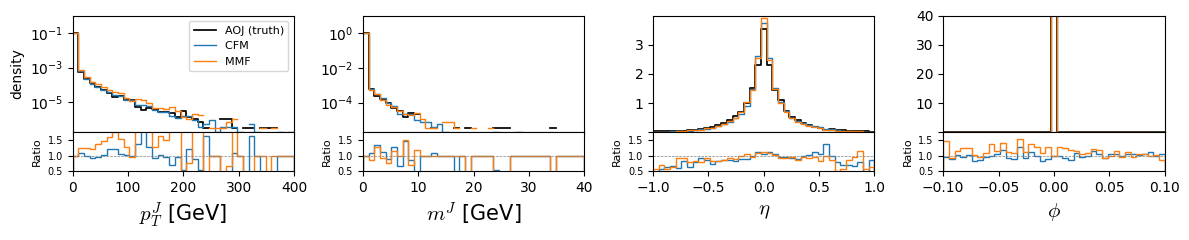

In [145]:
fig, axes = plt.subplots(2, 4, figsize=(12, 2.5), gridspec_kw={'height_ratios':[3,1], 'hspace': 0}, sharex='col')


plot_hist_and_ratio(test=aoj_muons, 
                    gen=cfm_muons, 
                    gen_ref=mmf_muons,
                    ax_hist=axes[0, 0], 
                    ax_ratio=axes[1, 0],  
                    feat='pt', 
                    xlim=(0, 400), 
                    ylim=(0, 1),  
                    num_bins=40, 
                    color_test = 'k',
                    lw=1.0,
                    xlabel= r'$p_T^J$ [GeV]', 
                    log_scale=(False, True),
                    ylabel='density', 
                    legend1='CFM ', 
                    legend2='MMF ', )

plot_hist_and_ratio(test=aoj_muons, 
                    gen=cfm_muons, 
                    gen_ref=mmf_muons,
                    ax_hist=axes[0, 1], 
                    ax_ratio=axes[1, 1],  
                    feat='m', 
                    xlim=(0, 40),  
                    ylim=(0, 10), 
                    num_bins=40, 
                    log_scale=(False, True),
                    color_test = 'k',
                    lw=1.0,
                    xlabel=r'$m^J$ [GeV]')
                    
plot_hist_and_ratio(test=aoj_muons, 
                    gen=cfm_muons, 
                    gen_ref=mmf_muons,
                    ax_hist=axes[0, 2], 
                    ax_ratio=axes[1, 2],  
                    feat='eta', 
                    xlim=(-1,1), 
                    ylim=(0,4),  
                    num_bins=40,
                    color_test = 'k',
                    lw=1.0, 
                    xlabel=r'$\eta$')

plot_hist_and_ratio(test=aoj_muons, 
                    gen=cfm_muons, 
                    gen_ref=mmf_muons,
                    ax_hist=axes[0, 3], 
                    ax_ratio=axes[1, 3],  
                    feat='phi', 
                    xlim=(-0.1,0.1), 
                    ylim=(0,40),  
                    num_bins=40,
                    color_test = 'k',
                    lw=1.0, 
                    xlabel=r'$\phi$')


axes[0, 2].set_yticks([0,1,2,3])
axes[0, 2].set_yticklabels(['',1,2,3])
axes[0, 3].set_yticks([0,10,20,30,40])
axes[0, 3].set_yticklabels(['',10,20,30,40])

plt.tight_layout()
plt.savefig("muons_subjets.png", dpi=500)
plt.show()

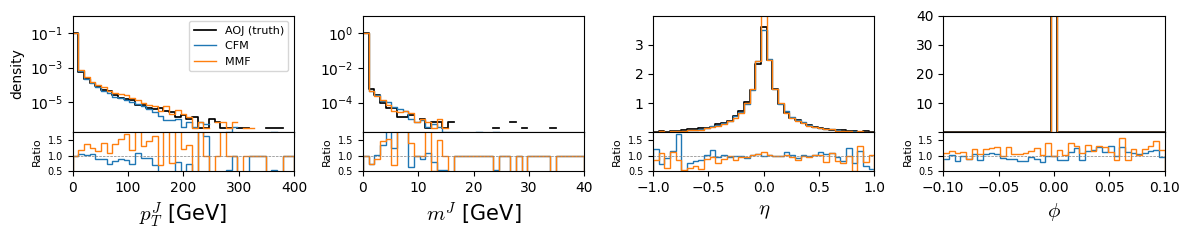

In [146]:
fig, axes = plt.subplots(2, 4, figsize=(12, 2.5), gridspec_kw={'height_ratios':[3,1], 'hspace': 0}, sharex='col')


plot_hist_and_ratio(test=aoj_antimuons, 
                    gen=cfm_antimuons, 
                    gen_ref=mmf_antimuons,
                    ax_hist=axes[0, 0], 
                    ax_ratio=axes[1, 0],  
                    feat='pt', 
                    xlim=(0, 400), 
                    ylim=(0, 1),  
                    num_bins=40, 
                    color_test = 'k',
                    lw=1.0,
                    xlabel= r'$p_T^J$ [GeV]', 
                    log_scale=(False, True),
                    ylabel='density', 
                    legend1='CFM ', 
                    legend2='MMF ', )

plot_hist_and_ratio(test=aoj_antimuons, 
                    gen=cfm_antimuons, 
                    gen_ref=mmf_antimuons,
                    ax_hist=axes[0, 1], 
                    ax_ratio=axes[1, 1],  
                    feat='m', 
                    xlim=(0, 40),  
                    ylim=(0, 10), 
                    num_bins=40, 
                    log_scale=(False, True),
                    color_test = 'k',
                    lw=1.0,
                    xlabel=r'$m^J$ [GeV]')
                    
plot_hist_and_ratio(test=aoj_antimuons, 
                    gen=cfm_antimuons, 
                    gen_ref=mmf_antimuons,
                    ax_hist=axes[0, 2], 
                    ax_ratio=axes[1, 2],  
                    feat='eta', 
                    xlim=(-1,1), 
                    ylim=(0,4),  
                    num_bins=40,
                    color_test = 'k',
                    lw=1.0, 
                    xlabel=r'$\eta$')

plot_hist_and_ratio(test=aoj_antimuons, 
                    gen=cfm_antimuons, 
                    gen_ref=mmf_antimuons,
                    ax_hist=axes[0, 3], 
                    ax_ratio=axes[1, 3],  
                    feat='phi', 
                    xlim=(-0.1,0.1), 
                    ylim=(0,40),  
                    num_bins=40,
                    color_test = 'k',
                    lw=1.0, 
                    xlabel=r'$\phi$')


axes[0, 2].set_yticks([0,1,2,3])
axes[0, 2].set_yticklabels(['',1,2,3])
axes[0, 3].set_yticks([0,10,20,30,40])
axes[0, 3].set_yticklabels(['',10,20,30,40])

plt.tight_layout()
plt.savefig("antimuons_subjets.png", dpi=500)
plt.show()

In [137]:

cfm_leptons = get_flavor_leptons_subjets(sample_cfm, flavor=5)
aoj_leptons = get_flavor_leptons_subjets(test, flavor=5)
mmf_leptons = get_flavor_leptons_subjets(sample_mmf_calibrated, flavor=5)

Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness


Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness
Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness


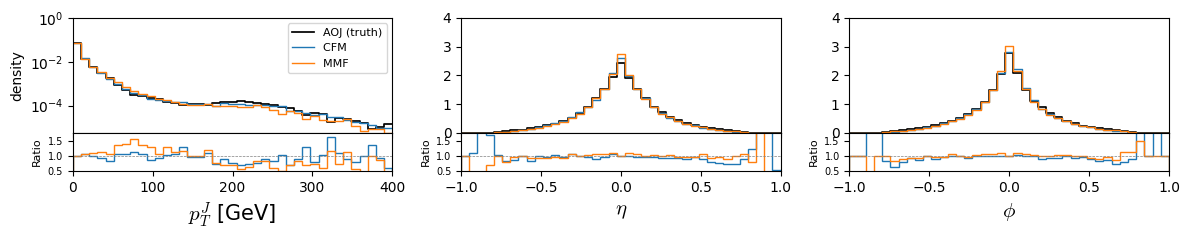

In [138]:
fig, axes = plt.subplots(2, 3, figsize=(12, 2.5), gridspec_kw={'height_ratios':[3,1], 'hspace': 0}, sharex='col')


plot_hist_and_ratio(test=aoj_leptons.constituents, 
                    gen=cfm_leptons.constituents, 
                    gen_ref=mmf_leptons.constituents,
                    apply_map_test='mask_bool',
                    apply_map_gen='mask_bool',
                    apply_map_gen_ref='mask_bool',
                    ax_hist=axes[0, 0], 
                    ax_ratio=axes[1, 0],  
                    feat='pt', 
                    xlim=(0, 400), 
                    ylim=(0, 1),  
                    num_bins=40, 
                    color_test = 'k',
                    lw=1.0,
                    xlabel= r'$p_T^J$ [GeV]', 
                    log_scale=(False, True),
                    ylabel='density', 
                    legend1='CFM ', 
                    legend2='MMF ', )

                    
plot_hist_and_ratio(test=aoj_leptons.constituents, 
                    gen=cfm_leptons.constituents, 
                    gen_ref=mmf_leptons.constituents,
                    apply_map_test='mask_bool',
                    apply_map_gen='mask_bool',
                    apply_map_gen_ref='mask_bool',
                    ax_hist=axes[0, 1], 
                    ax_ratio=axes[1, 1],  
                    feat='eta_rel', 
                    xlim=(-1,1), 
                    ylim=(0,4),  
                    num_bins=40,
                    color_test = 'k',
                    lw=1.0, 
                    xlabel=r'$\eta$')

plot_hist_and_ratio(test=aoj_leptons.constituents, 
                    gen=cfm_leptons.constituents, 
                    gen_ref=mmf_leptons.constituents,
                    apply_map_test='mask_bool',
                    apply_map_gen='mask_bool',
                    apply_map_gen_ref='mask_bool',
                    ax_hist=axes[0, 2], 
                    ax_ratio=axes[1, 2],  
                    feat='phi_rel', 
                    xlim=(-1,1), 
                    ylim=(0,4),  
                    num_bins=40,
                    color_test = 'k',
                    lw=1.0, 
                    xlabel=r'$\phi$')


# axes[0, 2].set_yticks([0,1,2,3])
# axes[0, 2].set_yticklabels(['',1,2,3])
# axes[0, 3].set_yticks([0,10,20,30,40])
# axes[0, 3].set_yticklabels(['',10,20,30,40])

plt.tight_layout()
plt.savefig("leptons_subjets.png", dpi=500)
plt.show()

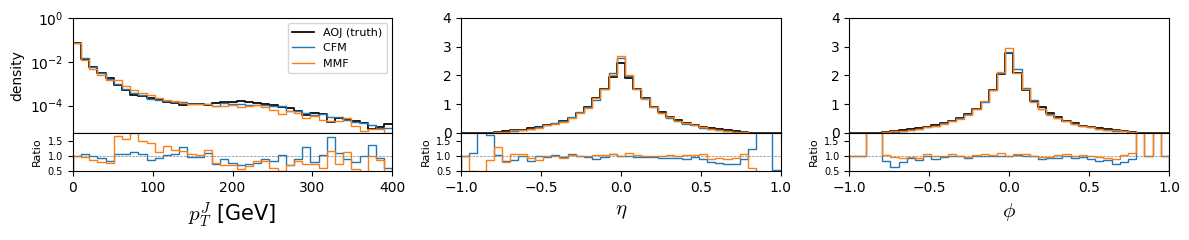

In [114]:
fig, axes = plt.subplots(2, 3, figsize=(12, 2.5), gridspec_kw={'height_ratios':[3,1], 'hspace': 0}, sharex='col')


plot_hist_and_ratio(test=aoj_leptons.constituents, 
                    gen=cfm_leptons.constituents, 
                    gen_ref=mmf_leptons.constituents,
                    apply_map_test='mask_bool',
                    apply_map_gen='mask_bool',
                    apply_map_gen_ref='mask_bool',
                    ax_hist=axes[0, 0], 
                    ax_ratio=axes[1, 0],  
                    feat='pt', 
                    xlim=(0, 400), 
                    ylim=(0, 1),  
                    num_bins=40, 
                    color_test = 'k',
                    lw=1.0,
                    xlabel= r'$p_T^J$ [GeV]', 
                    log_scale=(False, True),
                    ylabel='density', 
                    legend1='CFM ', 
                    legend2='MMF ', )

                    
plot_hist_and_ratio(test=aoj_leptons.constituents, 
                    gen=cfm_leptons.constituents, 
                    gen_ref=mmf_leptons.constituents,
                    apply_map_test='mask_bool',
                    apply_map_gen='mask_bool',
                    apply_map_gen_ref='mask_bool',
                    ax_hist=axes[0, 1], 
                    ax_ratio=axes[1, 1],  
                    feat='eta_rel', 
                    xlim=(-1,1), 
                    ylim=(0,4),  
                    num_bins=40,
                    color_test = 'k',
                    lw=1.0, 
                    xlabel=r'$\eta$')

plot_hist_and_ratio(test=aoj_leptons.constituents, 
                    gen=cfm_leptons.constituents, 
                    gen_ref=mmf_leptons.constituents,
                    apply_map_test='mask_bool',
                    apply_map_gen='mask_bool',
                    apply_map_gen_ref='mask_bool',
                    ax_hist=axes[0, 2], 
                    ax_ratio=axes[1, 2],  
                    feat='phi_rel', 
                    xlim=(-1,1), 
                    ylim=(0,4),  
                    num_bins=40,
                    color_test = 'k',
                    lw=1.0, 
                    xlabel=r'$\phi$')


# axes[0, 2].set_yticks([0,1,2,3])
# axes[0, 2].set_yticklabels(['',1,2,3])
# axes[0, 3].set_yticks([0,10,20,30,40])
# axes[0, 3].set_yticklabels(['',10,20,30,40])

plt.tight_layout()
plt.savefig("leptons_subjets.png", dpi=500)
plt.show()

In [ ]:


class JetChargeDipole:

    """
    Compute pT-weighted jet charge  Q_kappa  and
    the 2-point electric-dipole moment  d2  for every jet.
    """

    def __init__(self, data):

        """
        data: an object with attributes
              .continuous  (pT, eta, phi) padded with zeros
              .charge      integer charges (−1, 0, +1)
              .mask        boolean mask of real particles
        """
        self.x = data.constituents.continuous      # (n, D, 3)
        self.Q = data.constituents.charge          # (n, D)
        self.mask = data.constituents.mask_bool    # (n, D)

        # option: keep only jets that have ≥2 (for d2) or ≥1 (for Q) particles

        n_part = self.mask.sum(dim=1)
        self.valid_Q  = n_part >= 1
        self.valid_d2 = n_part >= 2

    def _delta_R(self, eta, phi):
        d_eta = eta.unsqueeze(1) - eta.unsqueeze(0)
        d_phi = torch.remainder(phi.unsqueeze(1) - phi.unsqueeze(0) + np.pi,
                                2 * np.pi) - np.pi
        return torch.sqrt(d_eta**2 + d_phi**2)

    def charge_and_dipole(self, kappa: float = 1.0, beta: float = 1.0):
        """
        Compute the pT-weighted jet charge  Q_kappa  and the electric–dipole
        moment  d2  for every jet in the batch.

        Returns
        -------
        Q_kappa : 1-D tensor, length = n_valid_jets
        d2      : 1-D tensor, length = n_valid_jets
                (jets with <2 particles get filtered out, like _auto_ecf)
        """

        Q0_list, Qkappa_list, d2_list = [],[],[]     # results for *all* jets
        mask_2_parts = (self.mask.sum(dim=1) >= 2)   # ≥2 real particles

        for idx, jet in enumerate(self.x):        # iterate over jets   (D,3) view

            pT, eta, phi = jet[:, 0], jet[:, 1], jet[:, 2]
            mask = pT > 0
            Q = self.Q[idx][mask].float() 
            pT = pT[mask]
            eta = eta[mask]
            phi = phi[mask]

            # -------------------------------------------------
            #   Jet charge   Q_kappa
            # -------------------------------------------------

            jet_pT = pT.sum()
            
            if jet_pT == 0:
                Qkappa = torch.nan
                Q0 = torch.nan
            else:
                Qkappa = (Q * pT**kappa).sum() / jet_pT
                Q0 = Q.sum() 

            # -------------------------------------------------
            #   Electric-dipole   d2
            # -------------------------------------------------

            if len(jet) < 2:
                d2 = torch.nan
            else:
                # pair-wise ΔR
                d_eta = eta.unsqueeze(1) - eta.unsqueeze(0)
                d_phi = torch.remainder(phi.unsqueeze(1) - phi.unsqueeze(0) + torch.pi,
                                        2 * torch.pi) - torch.pi
                R_ij  = torch.sqrt(d_eta**2 + d_phi**2).pow(beta)   # (N,N)

                weight   = (Q * pT).unsqueeze(1) * (Q * pT).unsqueeze(0)
                dip_mat  = weight * R_ij / 2.0          # divide-by-2 like _auto_ecf
                d2       = dip_mat.sum() / jet_pT**2

            Q0_list.append(Q0)
            Qkappa_list.append(Qkappa)
            d2_list.append(d2)

        # tensor-ise and filter exactly like _auto_ecf
        Q0 = torch.tensor(Q0_list)
        Qkappa  = torch.tensor(Qkappa_list)
        d2 = torch.tensor(d2_list)

        Q0  = Q0[mask_2_parts]
        Qkappa = Qkappa[mask_2_parts]
        d2 = d2[mask_2_parts]

        return Q0, Qkappa, d2


In [ ]:
aoj_dipole = JetChargeDipole(aoj)           # `data` is your padded batch
cfm_dipole = JetChargeDipole(cfm)
mmf_dipole = JetChargeDipole(mmf)

aoj_charge, aoj_jet_charge, aoj_jet_dipole = aoj_dipole.charge_and_dipole()
cfm_charge, cfm_jet_charge, cfm_jet_dipole = cfm_dipole.charge_and_dipole()
mmf_charge, mmf_jet_charge, mmf_jet_dipole = mmf_dipole.charge_and_dipole()


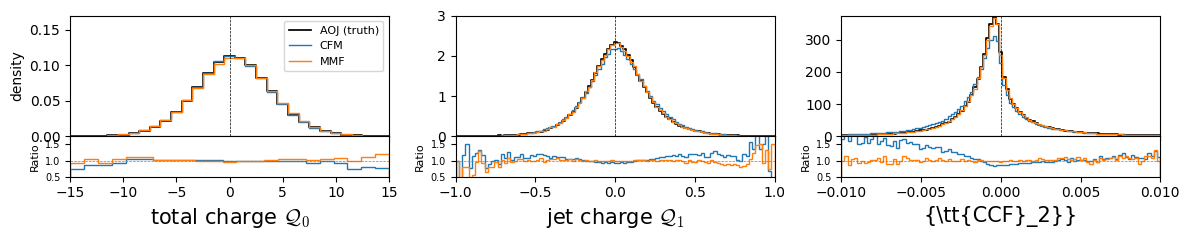

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(12, 2.5), gridspec_kw={'height_ratios':[3,1], 'hspace': 0.0}, sharex='col')

num_bins=100

plot_hist_and_ratio(aoj, 
                    cfm,
                    mmf,  
                    axes[0, 0], axes[1, 0], 
                    feat='charge',
                    xlim=(-15,15), 
                    ylim=(0, 0.17),
                    color_test = 'k',
                    lw=1.0, 
                    num_bins=24, 
                    discrete=True,
                    xlabel=r'total charge $\mathcal{Q}_0$', 
                    ylabel='density', 
                    legend1='CFM', 
                    legend2='MMF')


plot_hist_and_ratio(aoj,
                    cfm,
                    mmf,  
                    axes[0, 1], axes[1, 1], 
                    feat='jet_charge',
                    xlim=(-1,1), 
                    ylim=(0, 3),
                    color_test = 'k',
                    lw=1.0, 
                    num_bins=num_bins, 
                    xlabel=r'jet charge $\mathcal{Q}_1$', 
                    )

plot_hist_and_ratio(aoj_jet_dipole, 
                    cfm_jet_dipole, 
                    mmf_jet_dipole,  
                    axes[0, 2], axes[1, 2], 
                    xlim=(-.01,.01), 
                    ylim=(0, 375),
                    color_test = 'k',
                    lw=1.0, 
                    num_bins=num_bins, 
                    xlabel=r'CCF$_2$',
                    # log_scale=(False, True),

                    )
# add vertical liune at x=0
axes[0, 0].axvline(x=0, color='k', linestyle='--', lw=0.5)
axes[0, 1].axvline(x=0, color='k', linestyle='--', lw=0.5)
axes[0, 2].axvline(x=0, color='k', linestyle='--', lw=0.5)

plt.tight_layout()
plt.savefig("dipole.png", dpi=500)
plt.show()


In [ ]:
import numpy as np
import torch
from argparse import ArgumentParser
from pytorch_lightning.loggers import CometLogger
import pytorch_lightning as L
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, random_split
from transformers import GPT2Config

from utils.tensorclass import TensorMultiModal
from utils.aoj import AspenOpenJets 
from utils.datasets import MultiModalDataset, DataCoupling, data_coupling_collate_fn
from utils.callbacks import GPTGeneratorCallback
from model.MMF import MultiModalFlowBridge


experiment_id = "efb5ee16ee754d639dfd041b33e8883c"
num_jets = 100

mmf = MultiModalFlowBridge.load_from_checkpoint(f"/home/df630/Multimodal-flows/jet_sequences/{experiment_id}/checkpoints/best.ckpt")
mmf.num_timesteps = 100
#...dataset & dataloaders:


aoj = AspenOpenJets(data_dir="/home/df630/Multimodal-Bridges/data/aoj", data_files="RunG_batch1.h5")
test, metadata = aoj(num_jets=num_jets,
                download=False,
                features={"continuous": ['pt', 'eta_rel', 'phi_rel'], "discrete": "tokens"},
                pt_order=True,
                padding='zeros')


gauss_noise = torch.randn_like(test.continuous) * test.mask
cat_noise = torch.randint_like(test.discrete, 1, mmf.vocab_size) * test.mask
t0 = torch.full((len(cat_noise),), mmf.time_eps)  # (B) t_0=eps

source = TensorMultiModal(continuous=gauss_noise, discrete=cat_noise, mask=test.mask.clone(), time=t0)
source = source.to(mmf.device)


data = DataCoupling(source=source, target=TensorMultiModal())

sample = mmf.simulate_dynamics(data)
sample.target.apply_mask()
sample = sample.target.detach().cpu() 


/home/df630/Multimodal-flows/multimodal_flows/utils/aoj.py:85: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  list_discrete_feats.append(torch.tensor(feats[features["discrete"]]))
